## Assignment2 - Supervised Learning flow-

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Chen 7401
# student 2: Ofek 5806
# student 3: Shahar 8044
# student 4: Lian 4188
# student 5: Omer 8665
# student 6: Perry 4846

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# קריאת הנתונים
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
# הצגת הנתונים הראשוניים של ה-Train וה-Test set
print("Train set:")
print(train_df.head())
print("\nTest set:")
print(test_df.head())


Train set:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test set:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [4]:
# הצגת סטטיסטיקות כלליות על ה-Train וה-Test set
train_stats = train_df.describe(include='all')
test_stats = test_df.describe(include='all')

# הדפסת הסטטיסטיקות בצורה מסודרת
print("\nTrain set statistics:")
print(train_stats)

print("\nTest set statistics:")
print(test_stats)



Train set statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

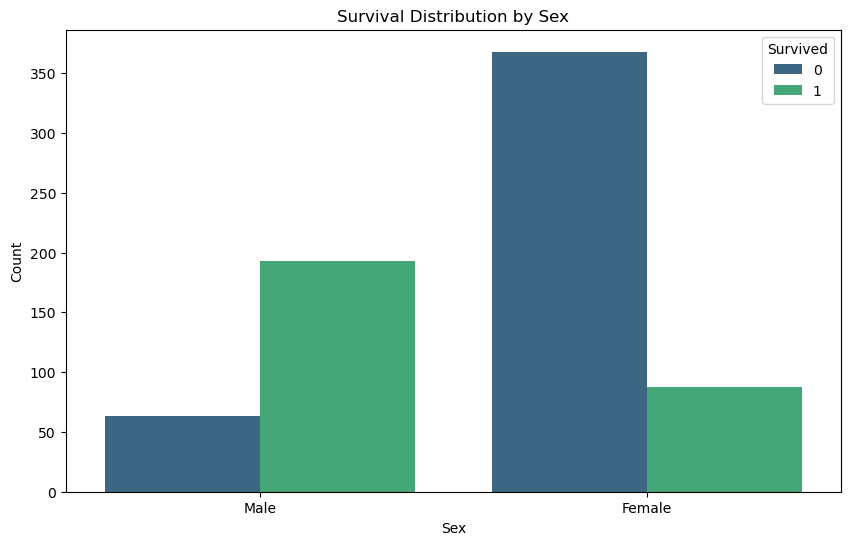

<Figure size 1000x600 with 0 Axes>

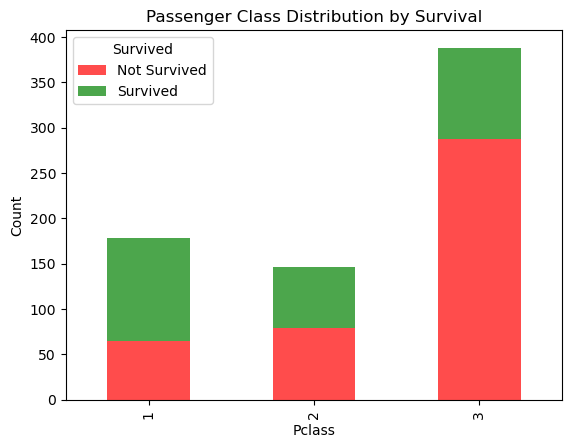

In [5]:
# ויזואליזציה של הישרדות לפי מין
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Survived', loc='upper right')
plt.show()

# ויזואליזציה של מחלקות הנוסעים לפי הישרדות עם גרף מוערם (Stacked Bar Chart)
plt.figure(figsize=(10, 6))

# יצירת טבלה ציר עם ספירה של כל קטגוריה
pclass_survived_counts = train_df.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)

# ציור גרף עמודות מוערם
pclass_survived_counts.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.title('Passenger Class Distribution by Survival')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'])
plt.show()

In [6]:
# הכנת הנתונים לאימון ללא סילום
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train_no_scaling = train_df[features]
y_train = train_df['Survived']
X_test_no_scaling = test_df[features]
y_test = test_df['Survived']

# הצגת נתוני האימון והבדיקה ללא סילום
print("\nX_train ללא סילום:")
print(X_train_no_scaling.head().to_string(index=False))
print("\nX_test ללא סילום:")
print(X_test_no_scaling.head().to_string(index=False))

# הכנת הנתונים לאימון עם סילום
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_scaling)
X_test_scaled = scaler.transform(X_test_no_scaling)

# המרת התוצאות ל-DataFrame לצורך הצגה ברורה יותר
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

# הצגת נתוני האימון והבדיקה לאחר סילום
print("\nX_train עם סילום:")
print(X_train_scaled_df.head().to_string(index=False))
print("\nX_test עם סילום:")
print(X_test_scaled_df.head().to_string(index=False))


X_train ללא סילום:
 Pclass  Sex  Age  SibSp  Parch    Fare  Embarked
      1    0 54.0      1      0 78.2667         1
      2    0 45.0      0      0 13.5000         0
      3    1 20.0      0      0  9.5000         0
      3    1 36.0      0      0  7.8958         0
      3    1 22.0      0      0  8.0500         0

X_test ללא סילום:
 Pclass  Sex       Age  SibSp  Parch    Fare  Embarked
      3    1 35.000000      0      0  7.0500         0
      3    1 30.000000      0      0  7.2500         0
      3    1 29.699118      0      0 14.5000         0
      3    0 21.000000      0      0  7.7500         2
      3    1 32.000000      0      0 56.4958         0

X_train עם סילום:
   Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
-1.539037 -1.334635  1.856683  0.447601 -0.479528  0.921411  0.966584
-0.350540 -1.334635  1.173766 -0.500887 -0.479528 -0.379097 -0.573031
 0.837957  0.749269 -0.723225 -0.500887 -0.479528 -0.459416 -0.573031
 0.837957  0.749269  0.490849 -0

In [7]:
# הגדרת פרמטרים ל-KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# חיפוש פרמטרים מיטביים ל-KNN ללא סילום
knn_grid_search_no_scaling = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1_macro')
knn_grid_search_no_scaling.fit(X_train_no_scaling, y_train)
knn_best_no_scaling = knn_grid_search_no_scaling.best_estimator_
knn_best_params_no_scaling = knn_grid_search_no_scaling.best_params_
test_preds_knn_no_scaling = knn_best_no_scaling.predict(X_test_no_scaling)

# חיפוש פרמטרים מיטביים ל-KNN עם סילום
knn_grid_search_scaled = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1_macro')
knn_grid_search_scaled.fit(X_train_scaled, y_train)
knn_best_scaled = knn_grid_search_scaled.best_estimator_
knn_best_params_scaled = knn_grid_search_scaled.best_params_
test_preds_knn_scaled = knn_best_scaled.predict(X_test_scaled)

# הגדרת פרמטרים לעץ החלטה (Decision Tree)
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'max_leaf_nodes': [10, 20, 30, 40, 50]
}

# חיפוש פרמטרים מיטביים לעץ החלטה ללא סילום
dt_grid_search_no_scaling = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_macro')
dt_grid_search_no_scaling.fit(X_train_no_scaling, y_train)
dt_best_no_scaling = dt_grid_search_no_scaling.best_estimator_
dt_best_params_no_scaling = dt_grid_search_no_scaling.best_params_
test_preds_dt_no_scaling = dt_best_no_scaling.predict(X_test_no_scaling)

# חיפוש פרמטרים מיטביים לעץ החלטה עם סילום
dt_grid_search_scaled = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_macro')
dt_grid_search_scaled.fit(X_train_scaled, y_train)
dt_best_scaled = dt_grid_search_scaled.best_estimator_
dt_best_params_scaled = dt_grid_search_scaled.best_params_
test_preds_dt_scaled = dt_best_scaled.predict(X_test_scaled)

# חישוב דיוק ודוחות סיווג למודלי KNN ו-Decision Tree
accuracy_test_knn_no_scaling = accuracy_score(y_test, test_preds_knn_no_scaling)
report_test_knn_no_scaling = classification_report(y_test, test_preds_knn_no_scaling, target_names=['Not Survived', 'Survived'])

accuracy_test_knn_scaled = accuracy_score(y_test, test_preds_knn_scaled)
report_test_knn_scaled = classification_report(y_test, test_preds_knn_scaled, target_names=['Not Survived', 'Survived'])

accuracy_test_dt_no_scaling = accuracy_score(y_test, test_preds_dt_no_scaling)
report_test_dt_no_scaling = classification_report(y_test, test_preds_dt_no_scaling, target_names=['Not Survived', 'Survived'])

accuracy_test_dt_scaled = accuracy_score(y_test, test_preds_dt_scaled)
report_test_dt_scaled = classification_report(y_test, test_preds_dt_scaled, target_names=['Not Survived', 'Survived'])

# הצגת תוצאות המודלים
print("\nKNN ללא סילום - תוצאות על קבוצת הבדיקה:")
print(f"דיוק: {accuracy_test_knn_no_scaling}")
print(report_test_knn_no_scaling)

print("\nKNN עם סילום - תוצאות על קבוצת הבדיקה:")
print(f"דיוק: {accuracy_test_knn_scaled}")
print(report_test_knn_scaled)

print("\nDecision Tree ללא סילום - תוצאות על קבוצת הבדיקה:")
print(f"דיוק: {accuracy_test_dt_no_scaling}")
print(report_test_dt_no_scaling)

print("\nDecision Tree עם סילום - תוצאות על קבוצת הבדיקה:")
print(f"דיוק: {accuracy_test_dt_scaled}")
print(report_test_dt_scaled)

# יצירת DataFrame להשוואת התוצאות
results = {
    'Model': ['KNN', 'KNN', 'Decision Tree', 'Decision Tree'],
    'Scaling': ['No', 'Yes', 'No', 'Yes'],
    'Accuracy': [accuracy_test_knn_no_scaling, accuracy_test_knn_scaled, accuracy_test_dt_no_scaling, accuracy_test_dt_scaled],
    'F1-Score': [
        classification_report(y_test, test_preds_knn_no_scaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, test_preds_knn_scaled, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, test_preds_dt_no_scaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, test_preds_dt_scaled, output_dict=True)['macro avg']['f1-score']
    ]
}

results_df = pd.DataFrame(results)

# הצגת הטבלה של תוצאות המודלים בצורה מסודרת
print("\nהשוואת התוצאות בין המודלים עם וללא סילום:")
print(results_df.to_markdown(index=False))

# יצירת DataFrame להצגת הקומבינציות הטובות ביותר של hyperparameters
best_params_results = {
    'Model': ['KNN No Scaling', 'KNN Scaling', 'Decision Tree No Scaling', 'Decision Tree Scaling'],
    'Best Hyperparameters': [knn_best_params_no_scaling, knn_best_params_scaled, dt_best_params_no_scaling, dt_best_params_scaled]
}

best_params_df = pd.DataFrame(best_params_results)
# הצגת הטבלה של הקומבינציות הטובות ביותר של hyperparameters בצורה מסודרת
print("\nהקומבינציות הטובות ביותר של hyperparameters:")
print(best_params_df.to_markdown(index=False))



KNN ללא סילום - תוצאות על קבוצת הבדיקה:
דיוק: 0.7653631284916201
              precision    recall  f1-score   support

Not Survived       0.80      0.86      0.83       118
    Survived       0.69      0.57      0.62        61

    accuracy                           0.77       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.76      0.77      0.76       179


KNN עם סילום - תוצאות על קבוצת הבדיקה:
דיוק: 0.8435754189944135
              precision    recall  f1-score   support

Not Survived       0.89      0.87      0.88       118
    Survived       0.76      0.79      0.77        61

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Decision Tree ללא סילום - תוצאות על קבוצת הבדיקה:
דיוק: 0.8491620111731844
              precision    recall  f1-score   support

Not Survived       0.85      0.93      0.89       118
    Survived       0.84      0

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [8]:
# בחירת הקומבינציה המוצלחת ביותר
best_model_name = "Decision Tree ללא סילום"
best_params = {'max_depth': 9, 'max_leaf_nodes': 20}

# הדפסת הקומבינציה המוצלחת ביותר
print("\n==========================")
print("הקומבינציה המוצלחת ביותר שנבחרה:")
print("==========================")
print(f"מודל: {best_model_name}")
print(f"היפר-פרמטרים: {best_params}")
print("==========================")

# יצירת המודל עם ההיפר-פרמטרים המוצלחים ביותר
best_model = DecisionTreeClassifier(max_depth=best_params['max_depth'], max_leaf_nodes=best_params['max_leaf_nodes'])

# אימון המודל על נתוני האימון בלבד
best_model.fit(X_train_no_scaling, y_train)

print("\n==========================")
print("המודל אומן בהצלחה על נתוני האימון")
print("==========================")



הקומבינציה המוצלחת ביותר שנבחרה:
מודל: Decision Tree ללא סילום
היפר-פרמטרים: {'max_depth': 9, 'max_leaf_nodes': 20}

המודל אומן בהצלחה על נתוני האימון


## Part 4 - Apply on test and show model performance estimation

In [9]:
# חיזוי על ה-test set עם המודל הנבחר
test_preds = best_model.predict(X_test_no_scaling)

# הצגת הסיווגים הראשונים על ה-test set
print("\n==========================")
print("הסיווגים הראשונים על ה-test set")
print("==========================")
print(test_preds[:10])  # הצגת 10 הסיווגים הראשונים
print("==========================")

# הצגת איכות המודל על ה-test set
accuracy_test = accuracy_score(y_test, test_preds)
report_dict = classification_report(y_test, test_preds, target_names=['Not Survived', 'Survived'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# שמירה על עמודות ה-precision, recall, f1-score, support והדפסה מסודרת
report_df = report_df[['precision', 'recall', 'f1-score', 'support']].loc[['Not Survived', 'Survived']]
report_df['support'] = report_df['support'].astype(int)  # המרת support לשלמים

# הדפסת הטבלה בצורה פשוטה
print("\n==========================")
print("איכות המודל על ה-test set")
print("==========================")
print(report_df)
print("==========================")

# הצגת הדיוק על ה-test set
print("\n==========================")
print("דיוק המודל על ה-test set")
print("==========================")
print(f"Accuracy: {accuracy_test:.6f}")
print("==========================")



הסיווגים הראשונים על ה-test set
[0 0 0 1 0 1 0 0 1 0]

איכות המודל על ה-test set
              precision    recall  f1-score  support
Not Survived   0.852713  0.932203  0.890688      118
Survived       0.840000  0.688525  0.756757       61

דיוק המודל על ה-test set
Accuracy: 0.849162
